# Imports

In [1]:
import pandas as pd

# Data Collection

In [2]:
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/CCBP_Platform_Projects/Plastic_Classification/train_X_pc.csv
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/CCBP_Platform_Projects/Plastic_Classification/train_Y_pc.csv
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/CCBP_Platform_Projects/Plastic_Classification/test_X_pc.csv

--2022-08-03 09:47:55--  https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/CCBP_Platform_Projects/Plastic_Classification/train_X_pc.csv
Resolving nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)... 52.219.156.150
Connecting to nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)|52.219.156.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9950 (9.7K) [text/csv]
Saving to: ‘train_X_pc.csv’

train_X_pc.csv      100%[===================>]   9.72K  --.-KB/s    in 0s      

2022-08-03 09:47:56 (129 MB/s) - ‘train_X_pc.csv’ saved [9950/9950]

--2022-08-03 09:47:56--  https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/CCBP_Platform_Projects/Plastic_Classification/train_Y_pc.csv
Resolving nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-b

In [3]:
train_X_df = pd.read_csv('train_X_pc.csv')
train_Y_df = pd.read_csv('train_Y_pc.csv', header=None).squeeze()
test_X_df = pd.read_csv('test_X_pc.csv')

# Implementation

In [4]:
train_X_df.head()

,Chlorine,Hardness,Hydrogen,Sulphur,Carbon,Oxygen,Nitrogen
0,11.044,10.455700,14.047,10.165,31.585,12.700,10.405
1,10.000,10.453963,13.900,11.863,31.210,12.079,10.906
2,11.179,10.455400,14.113,10.162,31.543,12.508,10.462
3,10.534,10.454839,14.392,10.000,31.930,12.601,10.537
4,10.000,10.458217,13.306,10.000,31.924,14.488,10.225


In [5]:
train_X_df.isna().sum()

Chlorine    0
Hardness    0
Hydrogen    0
Sulphur     0
Carbon      0
Oxygen      0
Nitrogen    0
dtype: int64

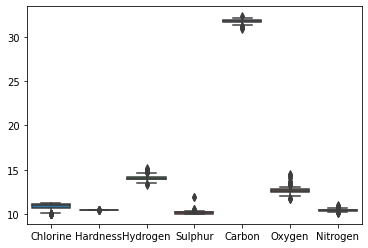

In [6]:
import seaborn as sns
sns.boxplot(data = train_X_df)

In [7]:
train_Y_df.head()

0    1
1    4
2    2
3    6
4    2
Name: 0, dtype: int64

In [8]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
pipe = Pipeline(steps = [('scaler', MinMaxScaler()),
                         ('classifier', LogisticRegression(solver='liblinear', max_iter=2000))])

In [29]:
param_distributions = [
              {
                'scaler': [MinMaxScaler(), RobustScaler(),StandardScaler(), 'passthrough'],
                'classifier': [LogisticRegression(solver='liblinear', max_iter=10000)],
                'classifier__penalty': ['l2', 'l1','elasticnet']
              },
              {
                'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
                'classifier': [KNeighborsClassifier()],
                'classifier__n_neighbors': range(1,40),
                'classifier__p': [1, 2, 3, 4,5,6],
                'classifier__weights':['uniform','distance'],
              }
            ]
random_search_cv = RandomizedSearchCV(pipe, param_distributions=param_distributions, n_iter=30, scoring='f1_weighted', refit=True, cv=20, random_state=0) 
random_search_cv.fit(train_X_df, train_Y_df)
print(random_search_cv.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=20.
  UserWarning,


{'scaler': RobustScaler(), 'classifier__weights': 'distance', 'classifier__p': 1, 'classifier__n_neighbors': 1, 'classifier': KNeighborsClassifier(n_neighbors=1, p=1, weights='distance')}


In [30]:
random_search_cv.cv_results_['mean_test_score'].max()

0.7551190476190476

In [31]:
best_model = random_search_cv.best_estimator_
predicted_test_Y = best_model.predict(test_X_df)
predicted_test_Y

array([1, 1, 6, 2, 2, 2, 6, 1, 2, 1, 1, 3, 2, 2, 2, 3, 1, 4, 1, 4, 1, 1,
       2, 2, 4, 4, 6, 6, 1, 4, 1, 2, 4, 1, 6, 2, 2, 2, 6, 2, 1, 2, 1, 1,
       2, 1, 1, 1, 6, 1, 1, 2, 6, 2])

# Submission 
Writing the predicted values to CSV file

In [32]:
predicted_test_Y = pd.DataFrame(predicted_test_Y).to_csv('predicted_test_Y_pc.csv', header=None, index=False)

In [33]:
from google.colab import files

#predicted_test_Y.to_csv('predicted_test_Y_pc.csv')
files.download('predicted_test_Y_pc.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>